In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error

In [6]:
# 2. Đọc file dữ liệu chứng khoán AAPL và chia train test validate theo tỉ lệ 7:3
df = pd.read_csv('ADS.DE.csv')
df = df[['Close']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

# Split the data into training, testing, and validation sets
train_size = int(0.7 * len(df))
test_size = int(0.3 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

In [7]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [8]:
# 4. Quá trình testing 
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
y_pred = model.predict(x_test)
# 5. Quá trình Validate
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Close'])
y_pred_val =  model.predict(x_val)

In [9]:
# 6. Quá trình tạo index predict 30 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(x_next_30_days)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[347.3147837  347.41932225 347.52386079 347.62839933 347.73293787
 347.83747641 347.94201495 348.04655349 348.15109203 348.25563057
 348.36016911 348.46470765 348.56924619 348.67378473 348.77832327
 348.88286181 348.98740035 349.0919389  349.19647744 349.30101598
 349.40555452 349.51009306 349.6146316  349.71917014 349.82370868
 349.92824722 350.03278576 350.1373243  350.24186284 350.34640138]


In [10]:
# 7. Đánh giá độ chính xác validate, test
from sklearn.metrics import mean_squared_error
def calculate_mse(y_test, y_pred):
  return mean_squared_error(y_test, y_pred)
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
valid_mse = calculate_mse(y_val, y_pred_val)
valid_mae = mean_absolute_error(y_val,y_pred_val)
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
test_mse = calculate_mse(y_test, y_pred)
test_mae = mean_absolute_error(y_test,y_pred)
print('Validation RMSE:', valid_rmse)
print('Validation MSE:', valid_mse)
print('Validation MAE:', valid_mae)
print('Testing RMSE:', test_rmse)
print('Testing MSE:', test_mse)
print('Testing MAE:', test_mae)

Validation RMSE: 180.01024816383858
Validation MSE: 32403.68944400675
Validation MAE: 180.01024816383858
Testing RMSE: 164.47492398448125
Testing MSE: 27052.000619700888
Testing MAE: 160.64393042459432


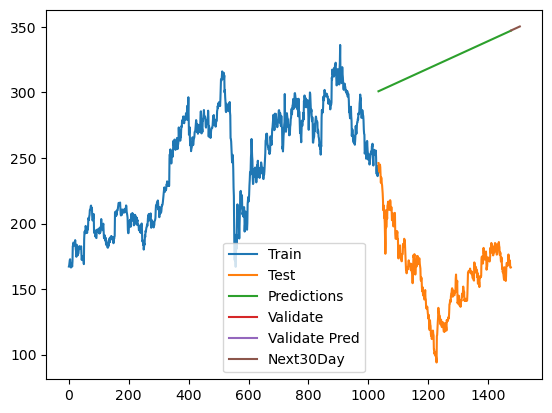

In [11]:
# 8.Vẽ hình
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_val)
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Validate','Validate Pred','Next30Day'])
plt.show()

In [12]:
test_data.index

RangeIndex(start=1034, stop=1477, step=1)